In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AE_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,NaN,0.135,0.0,0.135,0.000,NaN,NaN,NaN,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,0.065,NaN,0.000,1.189,NaN,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	5
float64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	0
float64		column 6	5
float64		column 7	10
float64		column 8	0
float64		column 9	15
float64		column 10	5
float64		column 11	15
float64		column 12	0
float64		column 13	0
float64		column 14	15
float64		column 15	45
float64		column 16	5
float64		column 17	35
float64		column 18	25
float64		column 19	0
float64		column 20	20
float64		column 21	25
float64		column 22	21
float64		column 23	10
float64		column 24	15
float64		column 25	61
float64		column 26	96
float64		column 27	0
float64		column 28	96
float64		column 29	75
float64		column 30	95
float64		column 31	86
float64		column 32	100
float64		column 33	0
float64		column 34	161
float64		column 35	131
float64		column 36	136
float64		column 37	25
float64		column 38	25
float64		column 39	15
float64		column 40	151
float64		column 41	10
float64		column 42	70
float64		column 43	36
float64		column 44	20
float64		col

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4592.000000,4597.000000,4597.000000,4597.000000,4597.000000,4592.000000,4587.000000,4597.000000,4582.000000,4592.000000,...,4582.000000,4536.000000,4542.000000,4577.000000,4587.000000,4542.000000,4521.000000,4516.000000,4506.000000,4522.000000
mean,0.104621,0.213200,0.280433,0.065482,0.312417,0.095838,0.114493,0.105347,0.090212,0.239562,...,0.031626,0.038808,0.138942,0.016931,0.269062,0.075972,0.043987,5.058630,52.194629,282.275984
std,0.305588,1.291121,0.504121,1.395757,0.672758,0.273882,0.391993,0.401235,0.279005,0.645054,...,0.285231,0.245034,0.271129,0.109517,0.816369,0.247061,0.431504,30.459236,196.254426,607.298824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.586000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.271500,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.314500,0.051750,0.000000,3.705250,43.000000,264.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

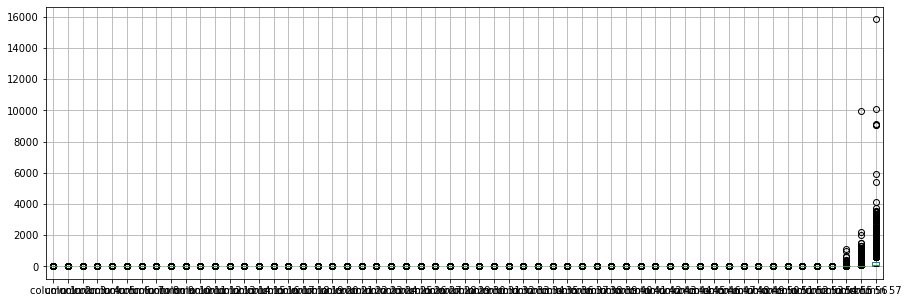

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.104621
column 2       0.213200
column 3       0.280433
column 4       0.065482
column 5       0.312417
column 6       0.095838
column 7       0.114493
column 8       0.105347
column 9       0.090212
column 10      0.239562
column 11      0.059819
column 12      0.541884
column 13      0.093833
column 14      0.058136
column 15      0.049363
column 16      0.249314
column 17      0.141813
column 18      0.184945
column 19      1.661710
column 20      0.084859
column 21      0.808329
column 22      0.121864
column 23      0.101328
column 24      0.094289
column 25      0.550886
column 26      0.267234
column 27      0.767973
column 28      0.123935
column 29      0.099449
column 30      0.103114
column 31      0.065389
column 32      0.047827
column 33      0.097313
column 34      0.049258
column 35      0.105253
column 36      0.098805
column 37      0.137822
column 38      0.013285
column 39      0.077706
column 40      0.066003
column 41      0.043667
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016865,0.066125,0.013266,0.023035,0.059521,0.007256,-0.004131,0.106438,0.040747,...,-0.017363,-0.026964,-0.022749,-0.032918,0.058287,0.116087,-0.011370,0.042972,0.058902,0.087598
column 2,-0.016865,1.000000,-0.033469,-0.006930,-0.023809,-0.024883,0.003871,-0.016302,-0.003896,0.032942,...,-0.015666,-0.007277,-0.049871,-0.018443,-0.014479,-0.009973,0.001715,0.002746,-0.000048,-0.023098
column 3,0.066125,-0.033469,1.000000,-0.020235,0.077986,0.086972,0.036564,0.012127,0.093025,0.032423,...,-0.025746,-0.032963,-0.015918,-0.034520,0.107528,0.087321,-0.003225,0.089595,0.106793,0.067968
column 4,0.013266,-0.006930,-0.020235,1.000000,0.003225,-0.010011,0.019752,0.010262,-0.002480,-0.004961,...,-0.001891,-0.000636,-0.012400,-0.007140,-0.003140,0.010850,-0.000440,0.005510,0.022152,0.018674
column 5,0.023035,-0.023809,0.077986,0.003225,1.000000,0.053585,0.147095,0.029518,0.020039,0.034652,...,-0.031663,-0.033327,-0.046094,-0.026100,0.025194,0.040824,0.002024,0.050639,0.051403,0.001863
column 6,0.059521,-0.024883,0.086972,-0.010011,0.053585,1.000000,0.060363,0.079738,0.116343,0.013840,...,-0.031429,-0.018936,-0.010824,-0.014572,0.065108,0.104422,0.019610,-0.009047,0.087007,0.082749
column 7,0.007256,0.003871,0.036564,0.019752,0.147095,0.060363,1.000000,0.044372,0.050859,0.055301,...,-0.031266,-0.033056,-0.051919,-0.027307,0.053683,0.070261,0.047265,0.043464,0.059432,-0.008105
column 8,-0.004131,-0.016302,0.012127,0.010262,0.029518,0.079738,0.044372,1.000000,0.105347,0.081734,...,-0.020998,-0.027176,-0.032240,-0.019416,0.031464,0.058326,-0.009251,0.010943,0.037728,0.039218
column 9,0.106438,-0.003896,0.093025,-0.002480,0.020039,0.116343,0.050859,0.105347,1.000000,0.128497,...,-0.025826,-0.014463,-0.031430,0.014002,0.043502,0.148857,-0.002801,0.104993,0.184763,0.248360
column 10,0.040747,0.032942,0.032423,-0.004961,0.034652,0.013840,0.055301,0.081734,0.128497,1.000000,...,-0.016519,0.012411,0.003172,0.007909,0.036613,0.075902,0.044439,0.069874,0.102780,0.086631


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+4,17+4+4,17+4+4+4,17+4+4,17+4,17], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 673.7488559098194
Epoch: 1 , loss: 667.2323175623027
Epoch: 2 , loss: 669.8577842047821
Epoch: 3 , loss: 667.1480327167577
Epoch: 4 , loss: 665.5925646526058
Epoch: 5 , loss: 663.0068495747105
Epoch: 6 , loss: 671.0604882855033
Epoch: 7 , loss: 671.2347523759051
Epoch: 8 , loss: 668.9561516898019
Epoch: 9 , loss: 670.2273989155733
Epoch: 10 , loss: 671.8717206363478
Epoch: 11 , loss: 668.5446381784898
Epoch: 12 , loss: 665.7542819777432
Epoch: 13 , loss: 668.6049128941128
Epoch: 14 , loss: 661.7243621773006
Epoch: 15 , loss: 663.0829450228489
Epoch: 16 , loss: 661.1415617141989
Epoch: 17 , loss: 653.9809280023342
Epoch: 18 , loss: 637.9544952605244
Epoch: 19 , loss: 601.8402655731095
Epoch: 20 , loss: 584.5579538112734
Epoch: 21 , loss: 576.958846381317
Epoch: 22 , loss: 568.0844078196881
Epoch: 23 , loss: 567.3575800985409
Epoch: 24 , loss: 571.6825268575955
Epoch: 25 , loss: 555.4447058169269
Epoch: 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.014618,0.000000,0.0,0.0,0.000000,0.024557,-1.247573,-31.958171,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.060295,0.0,0.0,0.037847,0.000000,0.000000,5.606136,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

5668.381199667706

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.11943830594986311

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.0,0.778,0.000000,0.000000,3.756000,61.000000,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000000,0.132000,0.0,0.372,0.180000,0.048000,5.114000,101.000000,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.014618,0.135000,0.0,0.135,0.000000,0.024557,2.289427,8.041829,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000000,0.223000,0.0,0.000,0.000000,0.000000,3.000000,15.000000,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.000000,0.054000,0.0,0.164,0.054000,0.000000,1.671000,4.000000,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,0.348000,0.0,1.160,0.000000,0.000000,3.121000,15.000000,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.000000,3.043000,15.000000,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,0.136000,0.0,0.000,0.000000,0.409000,1.837000,12.000000,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.000000,0.092295,0.0,0.065,0.037847,0.000000,1.189000,10.606136,69.0


In [21]:
imputations[-1].to_excel("Spam_AE_1(imp).xlsx", index=False, header=False)